In [181]:
from __future__ import print_function
__author__= 'tma353'

import pylab as pl # plot style
import seaborn
import numpy as np
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [182]:
# 100 samples N (N>10 & N<2000) each of 5 different distributions (500 samples)the same population mean
# Normal, Poisson, Binomial, Chi-Squared distribution, Inverse Distribution-Wald

# distributions = ['pois', 'gaus', 'chisq', 'wald', 'norm', 'binomial']
distributions = ['chisq']

In [183]:
# the chi sq distribution uses number of degrees of freedom, is the same as the mean
mymean = 100
df = mymean

In [184]:
md = {} # md is an empty dictionary

In [185]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


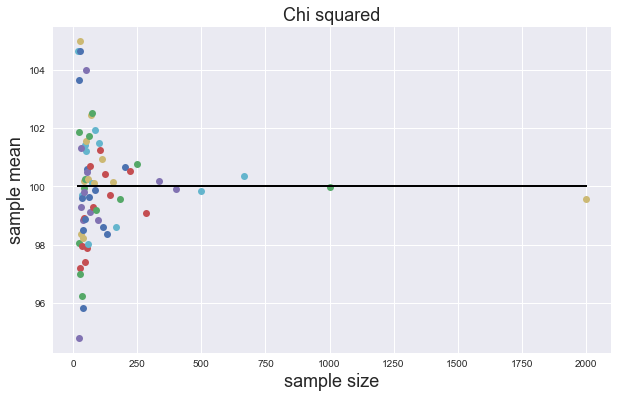

In [186]:
# overwrite the disctionary entry created a nested dictionary 
# outside dictionary hosts distributions as dictionary, 
# each distribution dictionary contains 100 distribution (arrays of diferent sizes)

df = mymean
md['chisq'] = {} # Chi square

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

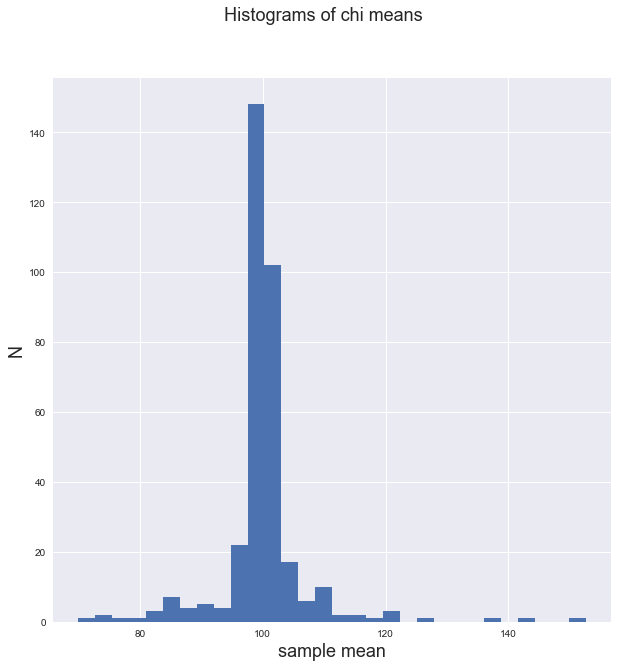

In [187]:
chimeans = list(md['chisq']['means'].values()) # hist of chi means means

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Histograms of chi means', fontsize=18)

In [188]:
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']

In [189]:
mymean = 100
df = mymean

In [190]:
# md['pois'] = np.random.poisson(df, size=100)

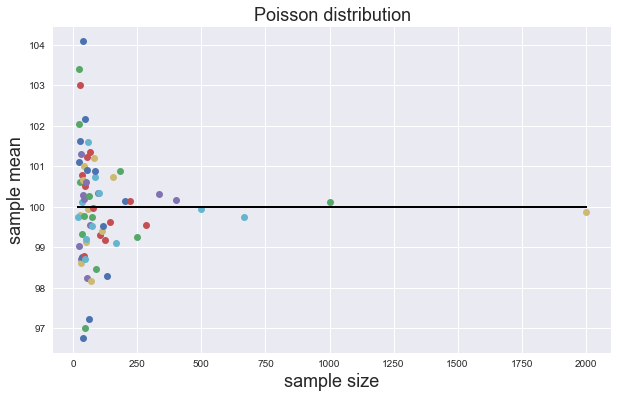

In [191]:
md['pois'] = {} # Poisson dist
lam = mymean

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

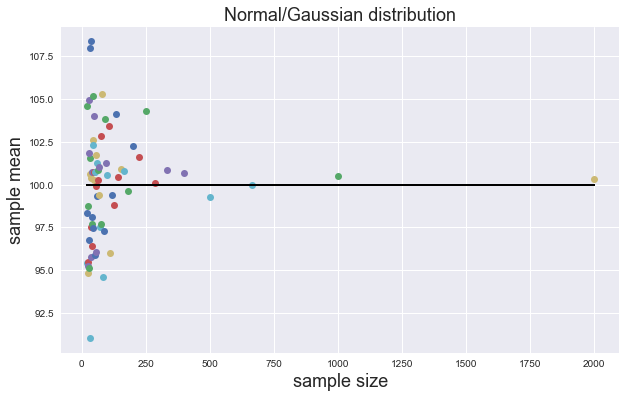

In [192]:
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'norm', 'binomial']
distributions = ['norm']

df = mymean

md['norm'] = {} # normal dist

for n in mysize:
    md['norm'][n] = np.random.normal(mymean, 23, size = n)
    
# save the means for plotting later    

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        # plot it
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal/Gaussian distribution', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

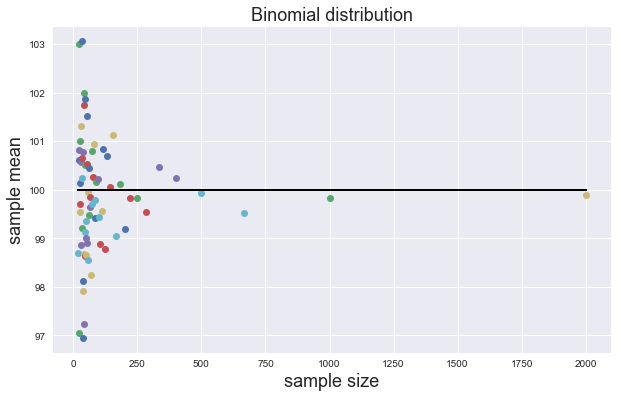

In [193]:
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'norm', 'binomial']
distributions = ['binomial']

df = mymean

md['binomial'] = {} # normal dist

for n in mysize:
    md['binomial'][n] = np.random.binomial(200, .5 , size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        # plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

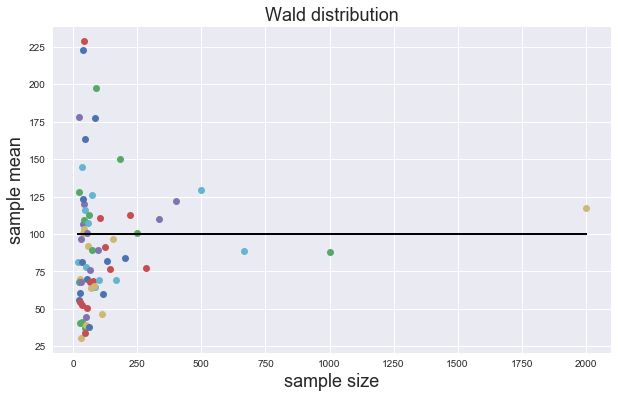

In [205]:
# distributions = ['pois', 'gaus', 'chisq', 'wald', 'norm', 'binomial']
distributions = ['wald'] # inverse gaussian

scale = 5

md['wald'] = {} # inverse normal dist

for n in mysize:
    md['wald'][n] = np.random.wald(mymean, scale, size = n)
    
# save the means for plotting later    

md['wald']['means'] = {}
axwald_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['wald']:
    if not type(nn) == str:
        md['wald']['means'][nn] = md['wald'][nn].mean()
        # plot it
        axwald_mu_n.plot(nn, md['wald']['means'][nn], 'o')
        axwald_mu_n.set_xlabel('sample size', fontsize=18)
        axwald_mu_n.set_ylabel('sample mean', fontsize=18)
        axwald_mu_n.set_title('Wald distribution', fontsize=18)
        axwald_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

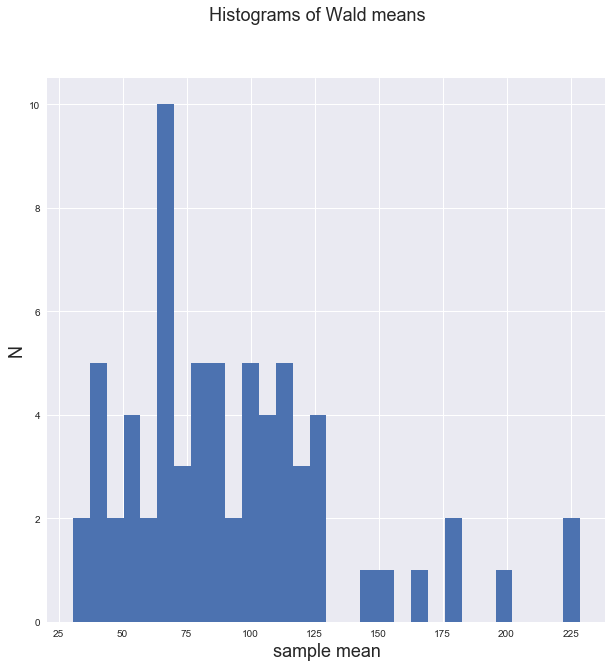

In [206]:
waldmeans = list(md['wald']['means'].values()) # hist of means

pl.figure(figsize=(10, 10))
pl.hist(waldmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Histograms of Wald means', fontsize=18)

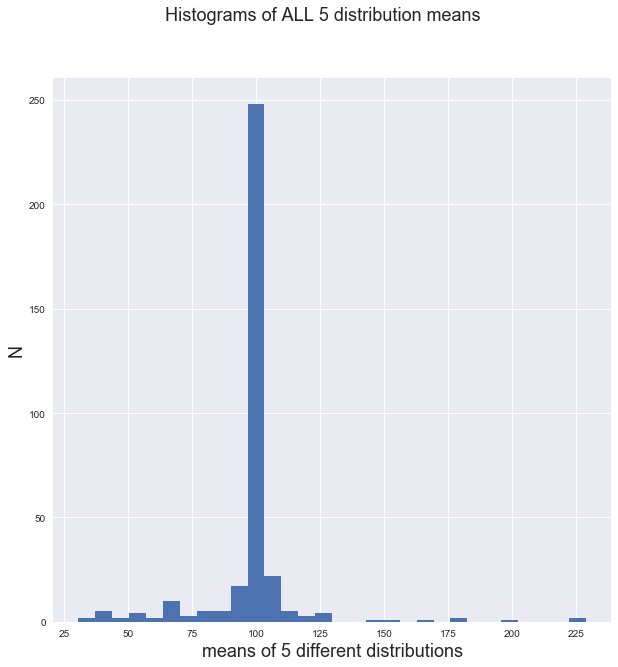

In [207]:
allmeans = list(md['chisq']['means'].values() + md['pois']['means'].values() + md['norm']['means'].values() + md['binomial']['means'].values() + md['wald']['means'].values()) # hist of all means

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('means of 5 different distributions', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Histograms of ALL 5 distribution means', fontsize=18)